Using KNN classification

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset

In [2]:
df_clss = pd.read_csv('Ex1-Class-train-1.csv')
df_clss

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,id-001,22.34,0.56,g,o,u,9.43,25.38,-20.91,-25.84,4.08,B
1,id-002,-2.31,7.36,i,p,y,-3.94,NaN,31.65,12.95,9.82,C
2,id-003,-17.55,-4.09,f,l,v,-11.02,-1.77,-17.57,15.98,11.43,D
3,id-004,-13.54,-5.42,g,p,x,4.11,2.22,16.72,9.86,16.43,A
4,id-005,13.39,-3.20,i,l,v,2.23,11.76,1.34,4.16,-6.49,B
...,...,...,...,...,...,...,...,...,...,...,...,...
485,id-486,12.54,3.16,h,m,v,-3.49,-16.43,-3.70,-4.12,-2.83,D
486,id-487,8.10,-2.49,i,m,u,-10.61,-1.63,-8.81,18.60,10.92,B
487,id-488,13.72,-10.59,i,m,y,-32.73,-3.94,NaN,8.97,-8.30,C
488,id-489,-6.12,-6.37,e,m,u,22.34,-4.66,-10.86,-17.77,-0.21,C


Exploratory Data Analysis

Check Missing Data

In [3]:
df_clss.isnull().sum()

id     10
x1     10
x2     10
x3     10
x4     10
x5     10
x6     10
x7     10
x8     10
x9     10
x10    10
y      10
dtype: int64

Since there is missing data, remove missing data

In [4]:
df_clss = df_clss.dropna()
df_clss.isnull().sum()

id     0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
y      0
dtype: int64

Check numerical

In [5]:
df_clss.dtypes

id      object
x1     float64
x2     float64
x3      object
x4      object
x5      object
x6     float64
x7     float64
x8     float64
x9     float64
x10    float64
y       object
dtype: object

since there are alphabet in row 3, 4, 5 convert it into ASCII

In [6]:
for row in df_clss.itertuples():
    asc = df_clss.at[row.Index, "x3"]
    asci = float(ord(asc))
    df_clss.at[row.Index, "x3"] = asci

for row in df_clss.itertuples():
    asc = df_clss.at[row.Index, "x4"]
    asci = float(ord(asc))
    df_clss.at[row.Index, "x4"] = asci

for row in df_clss.itertuples():
    asc = df_clss.at[row.Index, "x5"]
    asci = float(ord(asc))
    df_clss.at[row.Index, "x5"] = asci

In [7]:
df_clss

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,id-001,22.34,0.56,103.0,111.0,117.0,9.43,25.38,-20.91,-25.84,4.08,B
2,id-003,-17.55,-4.09,102.0,108.0,118.0,-11.02,-1.77,-17.57,15.98,11.43,D
3,id-004,-13.54,-5.42,103.0,112.0,120.0,4.11,2.22,16.72,9.86,16.43,A
4,id-005,13.39,-3.20,105.0,108.0,118.0,2.23,11.76,1.34,4.16,-6.49,B
5,id-006,0.58,12.09,102.0,108.0,120.0,-13.59,11.67,-12.12,-12.49,-8.07,A
...,...,...,...,...,...,...,...,...,...,...,...,...
484,id-485,-8.77,12.36,103.0,112.0,118.0,1.77,0.16,-1.45,14.18,-2.50,D
485,id-486,12.54,3.16,104.0,109.0,118.0,-3.49,-16.43,-3.70,-4.12,-2.83,D
486,id-487,8.10,-2.49,105.0,109.0,117.0,-10.61,-1.63,-8.81,18.60,10.92,B
488,id-489,-6.12,-6.37,101.0,109.0,117.0,22.34,-4.66,-10.86,-17.77,-0.21,C


hehe

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
LE = LabelEncoder()
df_clss['y']=LE.fit_transform(df_clss['y'])

/Users/tonkhaow/opt/anaconda3/envs/cognitivePro/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:>

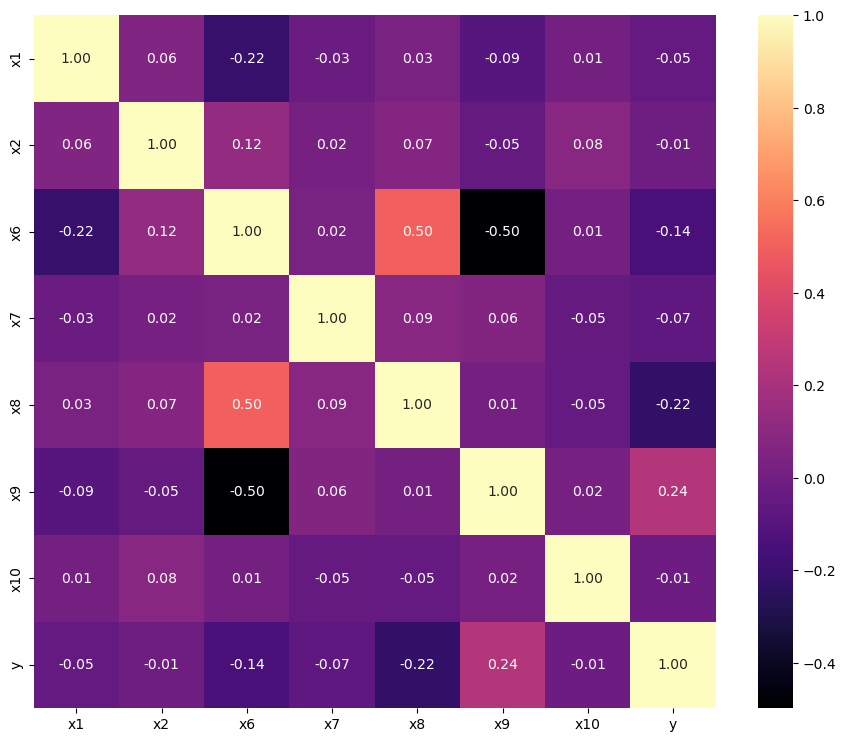

In [10]:
# Correlation heatmap
plt.figure(figsize=(11,9))
sns.heatmap(df_clss.corr(),annot=True,cmap="magma",fmt='.2f')

Training

In [11]:
X = df_clss.iloc[:,1:10]
y = df_clss.iloc[:,-1]

In [12]:
#Preparing the model
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 99)

Finding the best K value (GridSearchCV)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

cv = KFold(n_splits=10, random_state=1, shuffle=True)

grid_params_knn = { 'n_neighbors' : range(1,20)}

gs = GridSearchCV(KNeighborsClassifier(), grid_params_knn, cv=cv)
gs.fit(X_train, y_train)
gs.best_params_

{'n_neighbors': 18}

In [14]:
knn_final = KNeighborsClassifier(n_neighbors = 3)
knn_final.fit(X_train, y_train)
knn_final.score(X_test,y_test)

0.6538461538461539

Find the best K value (plot the accuracy)

In [15]:
accuracy = []
count = []
for i in range (1,41):
  knn_manual = KNeighborsClassifier(n_neighbors = i)
  knn_manual.fit(X_train, y_train)
  accuracy.append(knn_manual.score(X_test,y_test))
  count.append(i)

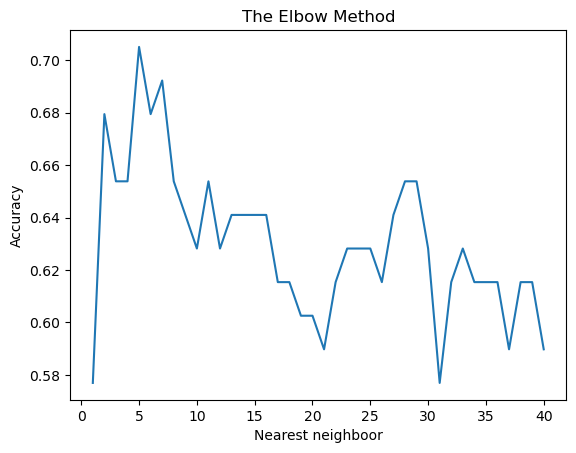

In [16]:
plt.title('The Elbow Method')
plt.plot(count,accuracy)
plt.xlabel('Nearest neighboor')
plt.ylabel('Accuracy')
plt.show()

Testing data

In [17]:
DT = pd.read_csv("Ex1-Class-unseen-1.csv")
DT

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,Q01,-9.06,-6.24,e,l,y,-17.25,13.47,-9.97,-9.37,8.36
1,Q02,-10.93,-0.05,e,l,y,-5.69,-6.59,-8.48,-17.99,-8.84
2,Q03,-9.06,0.07,e,p,y,-26.56,7.69,-15.15,-9.59,-21.66
3,Q04,5.94,10.92,h,n,v,36.03,-2.95,22.84,-16.83,7.12
4,Q05,27.87,37.07,i,m,u,1.32,0.71,-17.56,-6.77,4.05
5,Q06,-9.49,1.17,g,n,u,31.70,-18.75,3.05,5.02,19.09
6,Q07,1.78,-1.09,e,l,u,41.81,8.74,-2.88,-42.59,-5.83
7,Q08,-5.82,8.85,e,p,u,30.82,7.79,-20.49,-41.73,-1.85
8,Q09,-6.36,-2.47,e,l,y,-2.79,21.72,-6.36,-27.26,-13.94
9,Q10,-16.34,-8.00,g,o,u,1.29,-7.36,-11.29,23.43,-2.02


In [18]:
for row in DT.itertuples():
    asc = DT.at[row.Index, "x3"]
    asci = float(ord(asc))
    DT.at[row.Index, "x3"] = asci

for row in DT.itertuples():
    asc = DT.at[row.Index, "x4"]
    asci = float(ord(asc))
    DT.at[row.Index, "x4"] = asci

for row in DT.itertuples():
    asc = DT.at[row.Index, "x5"]
    asci = float(ord(asc))
    DT.at[row.Index, "x5"] = asci

In [19]:
DT

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,Q01,-9.06,-6.24,101.0,108.0,121.0,-17.25,13.47,-9.97,-9.37,8.36
1,Q02,-10.93,-0.05,101.0,108.0,121.0,-5.69,-6.59,-8.48,-17.99,-8.84
2,Q03,-9.06,0.07,101.0,112.0,121.0,-26.56,7.69,-15.15,-9.59,-21.66
3,Q04,5.94,10.92,104.0,110.0,118.0,36.03,-2.95,22.84,-16.83,7.12
4,Q05,27.87,37.07,105.0,109.0,117.0,1.32,0.71,-17.56,-6.77,4.05
5,Q06,-9.49,1.17,103.0,110.0,117.0,31.70,-18.75,3.05,5.02,19.09
6,Q07,1.78,-1.09,101.0,108.0,117.0,41.81,8.74,-2.88,-42.59,-5.83
7,Q08,-5.82,8.85,101.0,112.0,117.0,30.82,7.79,-20.49,-41.73,-1.85
8,Q09,-6.36,-2.47,101.0,108.0,121.0,-2.79,21.72,-6.36,-27.26,-13.94
9,Q10,-16.34,-8.00,103.0,111.0,117.0,1.29,-7.36,-11.29,23.43,-2.02


In [20]:
X_new = DT.iloc[:,1:10]
y_new = DT.iloc[:,-1]

In [21]:
y_new = LE.fit_transform(y_new)

In [22]:
knn_new = KNeighborsClassifier(n_neighbors = 3)
knn_new.fit(X_train, y_train)
y_pred = knn_new.predict(X_new)

In [24]:
diag = []
for i in range(len(y_pred)):
  if y_pred[i] == 0:
    diag.append('A')
  elif y_pred[i] == 1:
    diag.append('B')
  elif y_pred[i] == 2:
    diag.append('C')
  else:
    diag.append('D')

diag = pd.DataFrame(diag, columns = ['Predicted species'])